In [ ]:
# Import Required Libraries
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


This code installs essential Python libraries for data analysis, visualization, machine learning, and regression modeling, including `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`, and `xgboost`. It then imports these libraries along with specific tools for data splitting, regression models (Linear, Random Forest, XGBoost), and evaluation metrics like R², RMSE, and MAE.


In [ ]:
# Google Colab: Upload File
# Skip this if you're using local Jupyter
from google.colab import files
uploaded = files.upload()

# Replace with your exact filename
df = pd.read_csv("rainfall in india 1901-2015.csv")

# Drop missing values
df_cleaned = df.dropna()

# Select features (JAN to DEC) and target (ANNUAL)
X = df_cleaned.loc[:, "JAN":"DEC"]
y = df_cleaned["ANNUAL"]

Saving rainfall in india 1901-2015.csv to rainfall in india 1901-2015.csv


This code uploads a CSV file to Google Colab and reads it into a pandas DataFrame, specifically handling a rainfall dataset. It cleans the data by removing rows with missing values and then selects monthly rainfall data (JAN to DEC) as features and the annual rainfall as the target variable for machine learning modeling.


In [ ]:
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),  # FIXED HERE
        "MAE": mean_absolute_error(y_test, y_pred)
    }

# Display results
for model_name, metrics in results.items():
    print(f"\n {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.2f}")


 Linear Regression
R2 Score: 1.00
RMSE: 0.10
MAE: 0.08

 Random Forest
R2 Score: 0.97
RMSE: 165.27
MAE: 91.95

 XGBoost
R2 Score: 0.97
RMSE: 153.32
MAE: 82.08


This code splits the dataset into training (80%) and testing (20%) sets, then defines three regression models: Linear Regression, Random Forest, and XGBoost. It trains each model, makes predictions, evaluates performance using R², RMSE, and MAE metrics, and prints the results for comparison.


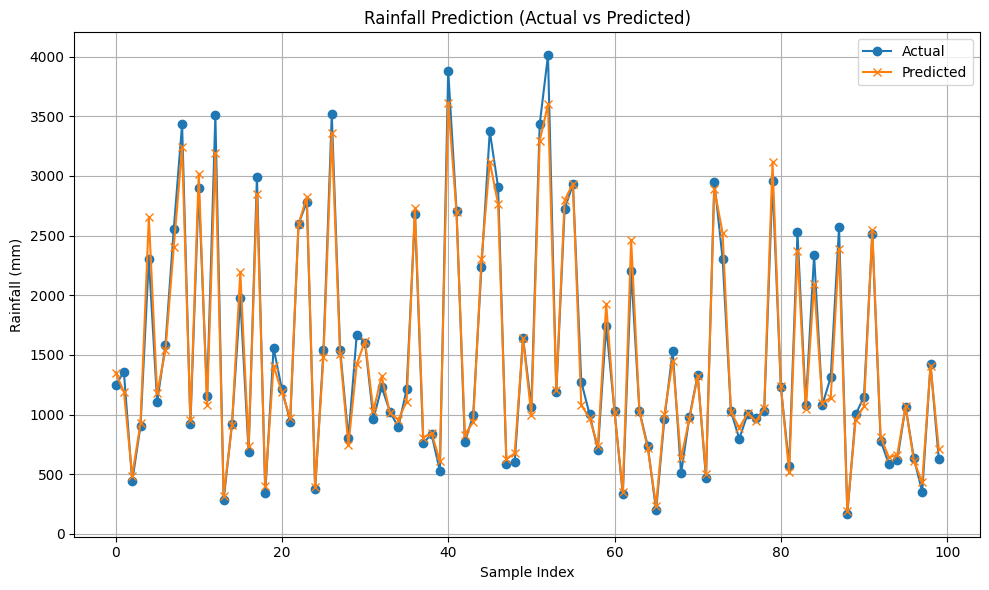

In [ ]:
# Choose best model manually or based on R²
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Plot
plt.figure(figsize=(10,6))
plt.plot(y_test.values[:100], label="Actual", marker='o')
plt.plot(y_pred[:100], label="Predicted", marker='x')
plt.title("Rainfall Prediction (Actual vs Predicted)")
plt.xlabel("Sample Index")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This graph visualizes the model's prediction performance, where blue circles represent actual rainfall values and orange crosses show the predicted values. The close alignment of the two curves suggests that the Random Forest model has captured the rainfall pattern fairly well, though some deviations indicate room for improvement.
